In [109]:
import sqlite3
import random
#import timeit #though to be for time execution
import time #to measure code execution
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print('bla')

bla


In [3]:

conn=sqlite3.connect('example.db')

##Homework

- make a table with Python and SQLite. It should have at least the columns ID and value. ID is a monotonically increasing number
- fill the table with 10, 1000, 100000, 1000000, 10000000 fields and read exactly one field. Measure how long does writing and reading take. Visualise these times
- Repeat above point, but fill in ID column an index
https://docs.python.org/2/library/sqlite3.html

In [4]:
c = conn.cursor()

In [48]:
c.execute('''CREATE TABLE PracticeWritingReading_01
             (ID int, text text)''')
c.execute('''CREATE TABLE PracticeWritingReading_02
             (ID int, text text, PRIMARY KEY AUTOINCREMENT)''')

OperationalError: table PracticeWritingReading_01 already exists

In [10]:
c.execute("INSERT INTO PracticeWritingReading VALUES ('2006-01-05', 'aa')")

In [31]:
conn.close()

In [13]:
c.execute('SELECT * FROM PracticeWritingReading WHERE symbol=?', 20)

ProgrammingError: Cannot operate on a closed database.

In [28]:
c.execute("SELECT * FROM PracticeWritingReading WHERE ID=?", ('2006-01-05',))

In [29]:
print (c.fetchone())

('2006-01-05', 'aa')


In [36]:
#c.execute('''CREATE TABLE PracticeWritingReading_01
#             (ID int, text text)''')
c.execute("INSERT INTO PracticeWritingReading_01 VALUES (1, 'aa')")


In [40]:
c.execute("SELECT * FROM PracticeWritingReading_01 WHERE ID=?", (1,))

ProgrammingError: Cannot operate on a closed database.

In [41]:
c.execute('''CREATE TABLE PracticeWritingReading_01
             (ID int, text text)''')

ProgrammingError: Cannot operate on a closed database.

In [42]:
c.execute("INSERT INTO PracticeWritingReading_01 VALUES (1, 'aa')")

ProgrammingError: Cannot operate on a closed database.

In [46]:
c.execute("SELECT * FROM PracticeWritingReading_01 WHERE ID=?", (1,))

In [60]:
c.execute("SELECT COUNT(*) FROM PracticeWritingReading_01")

In [61]:
print(c.execute("SELECT COUNT(*) FROM PracticeWritingReading_01"))

In [69]:
print(c.execute("SELECT COUNT(*) FROM PracticeWritingReading_01"))

In [93]:
#functio
#create table if it does not exist
#clear table
#fill table

def enterInTable(c, numberOfEntries, nameOfTable):
    t1 = time.time()
    print('\n\nnumber of entries is : ' + str(numberOfEntries) + '\n')
    #print(range(numberOfEntries))
    for i in range(numberOfEntries):
        entry = [i, str(random.randrange(numberOfEntries))]
        if ((i % (numberOfEntries/10) == 0)):
            print('one tenth is done' + str(numberOfEntries/10))
        executionString = 'INSERT INTO ' + nameOfTable + ' VALUES (' + str(i) + ', ' + str(random.randrange(numberOfEntries)) + ')'
        #print(executionString)
        #c.execute("INSERT INTO ? VALUES (?, ?)", nameOfTable, entry)
        c.execute(executionString)
    conn.commit()
    c.execute("SELECT COUNT(*) FROM PracticeWritingReading_01")
    print('new count is : ' +  str(c.fetchone()))
    t2 = time.time()
    print(str(t2-t1) + ' seconds took for execution')
    return (t2-t1)

10


number of entries is : 10

one tenth is done1.0
one tenth is done1.0
one tenth is done1.0
one tenth is done1.0
one tenth is done1.0
one tenth is done1.0
one tenth is done1.0
one tenth is done1.0
one tenth is done1.0
one tenth is done1.0
new count is : (10,)
0.00798344612121582 seconds took for execution
[0.00798344612121582]
100


number of entries is : 100

one tenth is done10.0
one tenth is done10.0
one tenth is done10.0
one tenth is done10.0
one tenth is done10.0
one tenth is done10.0
one tenth is done10.0
one tenth is done10.0
one tenth is done10.0
one tenth is done10.0
new count is : (110,)
0.007977962493896484 seconds took for execution
[0.00798344612121582, 0.007977962493896484]
1000


number of entries is : 1000

one tenth is done100.0
one tenth is done100.0
one tenth is done100.0
one tenth is done100.0
one tenth is done100.0
one tenth is done100.0
one tenth is done100.0
one tenth is done100.0
one tenth is done100.0
one tenth is done100.0
new count is : (1110,)
0.017970561

Text(0.5,1,'Relative difference')

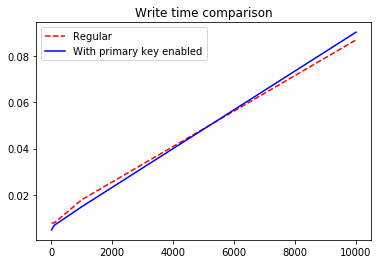

In [116]:
#Main function that shall call other functions
#numberOfIters = [10, 100, 1000, 10000, 100000, 1000000, 10000000]
numberOfIters = [10, 100, 1000, 10000]#, 100000, 1000000, 10000000]
executionTime1 = []
executionTime2 = []

nameOfTable = 'PracticeWritingReading_01'
clear_table(c, nameOfTable)
fillTableAccordingToIndex(c, nameOfTable, numberOfIters, executionTime1)

#split this such that first you fill in then search in the data
nameOfTableWithAutoKey = 'PracticeWritingReading_02'
clear_table(c, nameOfTableWithAutoKey)
fillTableAccordingToIndex(c, nameOfTableWithAutoKey, numberOfIters, executionTime2)
    
plt.figure(1)
line = plt.plot(numberOfIters, executionTime1, 'r--', numberOfIters, executionTime2, 'b')
line[0].set_label('Regular')
line[1].set_label('With primary key enabled')
plt.legend()
plt.title('Write time comparison')

plt.figure(2)
plt.plot(numberOfIters, np.divide(executionTime2,executionTime1))
plt.title('Write time comparison - Relative difference')



In [110]:
def printSomething():
    print('this shiiit')

In [111]:
printSomething()

this shiiit


In [49]:
c2.execute('''CREATE TABLE PracticeWritingReading_02
             (ID int, text text, PRIMARY KEY AUTOINCREMENT)''')

NameError: name 'c2' is not defined

In [50]:
c.execute('''CREATE TABLE PracticeWritingReading_02
             (ID int, text text, PRIMARY KEY AUTOINCREMENT)''')


OperationalError: near "AUTOINCREMENT": syntax error

In [51]:
c.execute('''CREATE TABLE PracticeWritingReading_02
             (ID int, text text)''')

In [84]:
def clear_table(c, table_name):
    c.execute('''DELETE FROM {};'''.format(table_name))

In [103]:
def fillTableAccordingToIndex(c, nameOfTable, numberOfIters, executionTimeWrite):
    clear_table(c, nameOfTable)
    for i in numberOfIters:
        print(i)
        writeTime = enterInTable(c, i, nameOfTable)
        executionTimeWrite.append(writeTime)
        print(executionTimeWrite)

In [ ]:
def searchTableAccordingToElement(c, nameOfTable, numberOfIters, element executionTime):
    t1 = time.time()
    #clear_table(c, nameOfTable)
    #executionString = 'INSERT INTO ' + nameOfTable + ' VALUES (' + str(i) + ', ' + str(random.randrange(numberOfEntries)) + ')'
    executionString = 'SELECT * FROM ' + nameOfTable + ' WHERE ID=5'
    (' + str(i) + ', ' + str(random.randrange(numberOfEntries)) + ')'
    c.execute(executionString)
    t2 = time.time()
    executionTime
    
    
    
    

In [ ]:
Schreibe einen decorator für die Funktion fib_slow, der Ergebnisse cachen kann wie der vorgestellte lru_cache. Dabei darf das Ergebnis nicht gecached werden, wenn n=13.

In [210]:
@my_decorator
def fib_slow(n):
    if n < 2:
        #print(n)
        return n
    return fib_slow(n-1) + fib_slow(n-2)

In [209]:
def my_decorator(func):
    cache = {}
    def wrapper(n):
        #print('pre')
        if n in cache.keys():
            return cache[n]
        if (n == 13):
            return func(n)
        else:
            result = func(n)
            cache[n] = result
        return result 
        #return func(n)
        #print('post')
    return wrapper   

In [ ]:
fib_slow(2000)

In [135]:
def my_decorator1(func):
    def wrapper():
        print('before func')
        func()
        print('after func')
    return wrapper

In [131]:
@my_decorator
def test():
    print('x')

In [132]:
test()

pre
x
post
